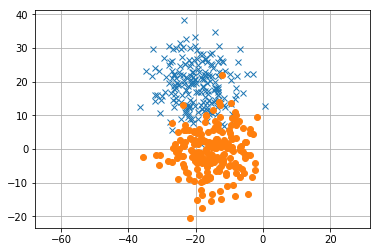

In [1]:
import numpy as np
import matplotlib.pyplot as plt


mean1 = [-20, 20]
cov1 = [[40, 0], [0, 40]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

mean2 = [-15, 0]
cov2 = [[40, 0], [0, 40]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'o')
plt.axis('equal')
plt.grid()
plt.show()

In [2]:
#x1
bias = np.ones(200, dtype=np.int) #Add bias term

pos = np.column_stack([x1,y1,bias])
neg = np.column_stack([x2,y2,bias])

all_patterns = np.concatenate([pos,neg])

In [3]:
targets = np.ones(200,dtype=np.int)
minus = -1 * np.ones(200,dtype=np.int)
targets = np.append(targets,minus)

all_samples = np.column_stack([all_patterns,targets])
np.random.shuffle(all_samples)

In [4]:
patterns = all_samples[:200,:3]
targets = all_samples[:200,3]

test_patterns = all_samples[200:,:3]
test_targets = all_samples[200:,3]
#print(test_patterns)
#print(test_targets)

In [5]:
def initWeights(dim):
    w = []
    for i in range(dim):
        w.append(np.random.normal(0,0.01))
    return w
        

In [6]:
#Dimension 2 columns, one for each dimension in input data
#W = 0.01 * np.random.randn(2,2)
W=initWeights(3)
print(W)

[-0.007911176516444492, 5.025322586620026e-05, -0.002866571678894257]


In [7]:
def test(W,X,y):
    predictions = []
    corr = 0
    for i in range(len(y)):        
        pred = np.dot(W,X[i])
        if pred>0:
            predictions.append(1)
        else:
            predictions.append(-1)
    #print(predictions)
    #print(y)
    
    for i in range(len(predictions)):
        if predictions[i]==y[i]:
            corr+=1
            
    acc = corr/len(y)
    return acc

In [8]:
def train_seq(patterns,targets,W,epochs):
    eta = 0.00001

    #Sekventiell
    print("Before training: ",test(W,test_patterns,test_targets))
    for i in range(epochs):
        prediction = np.dot(patterns[i],W) #w*X
        error = prediction-targets[i] #beräkna felet

        delta_w = -eta*np.dot(error,np.transpose(patterns[i])) #uppdatera vikterna
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For iteration",i,"acc is:",acc)
     
    return W

W_seq = train_seq(patterns,targets,W,20)
print(W_seq)

Before training:  0.515
For iteration 0 acc is: 0.515
For iteration 1 acc is: 0.515
For iteration 2 acc is: 0.515
For iteration 3 acc is: 0.515
For iteration 4 acc is: 0.515
For iteration 5 acc is: 0.515
For iteration 6 acc is: 0.515
For iteration 7 acc is: 0.515
For iteration 8 acc is: 0.515
For iteration 9 acc is: 0.515
For iteration 10 acc is: 0.515
For iteration 11 acc is: 0.515
For iteration 12 acc is: 0.515
For iteration 13 acc is: 0.515
For iteration 14 acc is: 0.515
For iteration 15 acc is: 0.515
For iteration 16 acc is: 0.515
For iteration 17 acc is: 0.515
For iteration 18 acc is: 0.515
For iteration 19 acc is: 0.515
[-0.00755851  0.00120564 -0.00290076]


In [9]:
print(test(W_seq,test_patterns,test_targets)) 

0.515


In [10]:
def train_batch(patterns,targets,W,epoch):
    eta = 0.00001
    delta_w=0
    print("Before training: ",test(W,test_patterns,test_targets))
    for n in range(epoch):
        error=0
        delta_w=0
        for i in range(len(targets)):
            prediction = np.dot(patterns[i],W) 
            error = prediction-targets[i]
            #print(error)
            delta_w += -eta*np.dot(error,np.transpose(patterns[i]))
        #uppdatera vikterna
        delta_w = delta_w/epoch
        ##print(delta_w)
        W = np.add(W,delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",n+1,"acc is:",acc)
    return W

W=initWeights(3)
W_batch = train_batch(patterns,targets,W,20)
print(W_batch)
print(test(W_batch,test_patterns,test_targets)) 

Before training:  0.26
For epoch 1 acc is: 0.24
For epoch 2 acc is: 0.235
For epoch 3 acc is: 0.195
For epoch 4 acc is: 0.175
For epoch 5 acc is: 0.155
For epoch 6 acc is: 0.14
For epoch 7 acc is: 0.125
For epoch 8 acc is: 0.09
For epoch 9 acc is: 0.08
For epoch 10 acc is: 0.17
For epoch 11 acc is: 0.28
For epoch 12 acc is: 0.485
For epoch 13 acc is: 0.515
For epoch 14 acc is: 0.515
For epoch 15 acc is: 0.515
For epoch 16 acc is: 0.525
For epoch 17 acc is: 0.53
For epoch 18 acc is: 0.55
For epoch 19 acc is: 0.555
For epoch 20 acc is: 0.575
[-0.00272152  0.00567382  0.0047818 ]
0.575


In [11]:
def trainPerc_seq(patterns, targets, W, epochs):
    eta = 0.00001
    for i in range(epochs):
        counter = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter = counter + 1
                error = targets[i]-prediction
                delta_w = eta*np.dot(error,np.transpose(patterns[j]))
                W = np.add(W, delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",i,"acc is:",acc,"Missprediction in training",counter)
     
    return W

W=initWeights(3)
W_perc_seq = trainPerc_seq(patterns,targets,W,20)
print(W_perc_seq)

For epoch 0 acc is: 0.48 Missprediction in training 99
For epoch 1 acc is: 0.89 Missprediction in training 64
For epoch 2 acc is: 0.53 Missprediction in training 60
For epoch 3 acc is: 0.515 Missprediction in training 102
For epoch 4 acc is: 0.515 Missprediction in training 103
For epoch 5 acc is: 0.525 Missprediction in training 103
For epoch 6 acc is: 0.515 Missprediction in training 102
For epoch 7 acc is: 0.7 Missprediction in training 100
For epoch 8 acc is: 0.485 Missprediction in training 60
For epoch 9 acc is: 0.535 Missprediction in training 66
For epoch 10 acc is: 0.48 Missprediction in training 67
For epoch 11 acc is: 0.515 Missprediction in training 76
For epoch 12 acc is: 0.515 Missprediction in training 103
For epoch 13 acc is: 0.705 Missprediction in training 103
For epoch 14 acc is: 0.515 Missprediction in training 101
For epoch 15 acc is: 0.86 Missprediction in training 86
For epoch 16 acc is: 0.475 Missprediction in training 95
For epoch 17 acc is: 0.47 Missprediction

In [12]:
def trainPerc_batch(patterns, targets, W, epochs):
    eta=0.000001
    for i in range(epochs):
        counter = 0
        delta_w = 0
        for j in range(len(patterns)):
            prediction = np.dot(patterns[j],W) #w*X
            if not (prediction<0)==(targets[j]<0):
                counter += 1
                error = targets[i]-prediction
                delta_w += eta*np.dot(error,np.transpose(patterns[j]))
        
        delta_w = delta_w
        W = np.add(W, delta_w)
        acc = test(W,test_patterns,test_targets)
        print("For epoch",i,"acc is:",acc,"Missprediction in training",counter)
     
    return W

W=initWeights(3)
W_perc_batch = trainPerc_batch(patterns,targets,W,20)
print(W_perc_batch)

For epoch 0 acc is: 0.485 Missprediction in training 97
For epoch 1 acc is: 0.485 Missprediction in training 97
For epoch 2 acc is: 0.49 Missprediction in training 97
For epoch 3 acc is: 0.91 Missprediction in training 96
For epoch 4 acc is: 0.925 Missprediction in training 13
For epoch 5 acc is: 0.91 Missprediction in training 14
For epoch 6 acc is: 0.93 Missprediction in training 13
For epoch 7 acc is: 0.91 Missprediction in training 14
For epoch 8 acc is: 0.865 Missprediction in training 13
For epoch 9 acc is: 0.915 Missprediction in training 19
For epoch 10 acc is: 0.89 Missprediction in training 15
For epoch 11 acc is: 0.915 Missprediction in training 14
For epoch 12 acc is: 0.94 Missprediction in training 14
For epoch 13 acc is: 0.915 Missprediction in training 14
For epoch 14 acc is: 0.94 Missprediction in training 14
For epoch 15 acc is: 0.915 Missprediction in training 15
For epoch 16 acc is: 0.905 Missprediction in training 14
For epoch 17 acc is: 0.855 Missprediction in trai